# <b>WeRateDogs Twitter</b> - Data Wrangling project<br>
Alina Grigorescu<br>
Bucharest, 2018<br>

In the following project I will gather data from a variety of sources and in a variety of formats from the <br><b>WeRateDogs</b> Twitter account, assess its quality and tidiness, then clean it. Thus, the main steps are presented below:
- Gathering Data<br>
- Assessing Data<br>
- Cleaning Data<br>
- Export Data to CSV file<br>
- Insights presentation<br>

<br><b>WeRateDogs</b> is a Twitter account that rates people's dogs with a humorous comment about the dog. It was started in 2015 by college student Matt Nelson, and has received international media coverage both for its popularity and for the attention drawn to social media copyright law when it was suspended by Twitter.

In [248]:
# Import libraries
import pandas as pd 
import numpy as np 
import tweepy 
import requests 
import json 
import os 
import matplotlib.pyplot as plt

# Gathering Data

## Manually gathered Data

In [175]:
# Read basic tweet data archive Manually
df_basic = pd.read_csv("twitter-archive-enhanced.csv")

df_basic.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1454,695446424020918272,NaN,NaN,2016-02-05 03:18:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate unicorns but this one h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/695446424...,12,10,None,None,None,None,None
669,790227638568808452,NaN,NaN,2016-10-23 16:25:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Leela. She's a Fetty Wo...,7.626999e+17,4.196984e+09,2016-08-08 17:19:51 +0000,https://twitter.com/dog_rates/status/762699858...,11,10,Leela,None,None,None,None
1953,673662677122719744,NaN,NaN,2015-12-07 00:37:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kendall. 12/10 would cuddle the hell o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673662677...,12,10,Kendall,None,None,None,None


## Programmatically gathered Data

In [176]:
# Read URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

# Save to file
with open('image-predictions.tsv', "wb") as file: file.write(r.content)
    
# Read imported data file
df_predict = pd.read_csv('image-predictions.tsv', sep="\t")

### Import Data from Twitter API

In [184]:
# Read API Keys
df_additional = pd.read_csv("API key token.csv")

In [ ]:
# Attribute API Keys to variables
API_key = df_additional.iloc[0,0]
API_secret_key = df_additional.iloc[1,0]
access_token = df_additional.iloc[2,0]
access_token_secret = df_additional.iloc[3,0]
print(consumer_key)

In [ ]:
# Create Connection to API
auth = tweepy.OAuthHandler(API_key, API_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
# For loop which will add each available tweet to a new line of tweet_json.txt
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in df_basic['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [ ]:
# For loop to add each tweet into a list
tweets_data = []
tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [ ]:
# Create df_info dataframe
df_info = pd.DataFrame()

In [ ]:
# Add the chosen variables to df_info dataframe
df_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
df_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
df_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [ ]:
df_info.sample(5)

# Data Assessment- Visual & Programmatic

In [192]:
# Visualise sample from archive file
df_basic.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1594,686377065986265092,NaN,NaN,2016-01-11 02:40:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Birf. He thinks he's gone blind. 10/10 ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686377065...,10,10,Birf,None,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
2168,669354382627049472,NaN,NaN,2015-11-25 03:18:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Dug. Dug fucken loves peaches. 8/10 https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669354382...,8,10,Dug,None,None,None,None
2305,666837028449972224,NaN,NaN,2015-11-18 04:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My goodness. Very rare dog here. Large. Tail d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666837028...,3,10,None,None,None,None,None
471,816697700272001025,NaN,NaN,2017-01-04 17:27:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Binky. She appears to be rather h*ckin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816697700...,12,10,Binky,None,None,None,None
2244,667886921285246976,NaN,NaN,2015-11-21 02:07:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Erik. He's fucken massive. But also ki...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667886921...,11,10,Erik,None,None,None,None
394,825829644528148480,NaN,NaN,2017-01-29 22:15:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He just found out you only prete...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825829644...,12,10,Toby,None,None,None,None
1511,691416866452082688,NaN,NaN,2016-01-25 00:26:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I present to you... Dog Jesus. 13/10 (he could...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691416866...,13,10,None,None,None,None,None
378,827933404142436356,NaN,NaN,2017-02-04 17:34:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kona. Yesterday she stopped by the dep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/827933404...,12,10,Kona,None,None,pupper,None


In [193]:
# Programmatic asessment of content features of archive file
df_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [194]:
# Visualise sample from prediction file
df_predict.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1238,746818907684614144,https://pbs.twimg.com/media/Cl071YVWEAAlF7N.jpg,1,dingo,0.175518,False,timber_wolf,0.133647,False,Ibizan_hound,0.101537,True
966,706291001778950144,https://pbs.twimg.com/media/Cc0_2tXXEAA2iTY.jpg,1,Border_terrier,0.587101,True,bull_mastiff,0.164087,True,Staffordshire_bullterrier,0.105011,True
67,667177989038297088,https://pbs.twimg.com/media/CUJK18UWEAEg7AR.jpg,1,vizsla,0.259249,True,Chesapeake_Bay_retriever,0.176293,True,Weimaraner,0.112369,True
1065,715680795826982913,https://pbs.twimg.com/media/Ce6b4MPWwAA22Xm.jpg,1,golden_retriever,0.990715,True,Labrador_retriever,0.002228,True,chow,0.001197,True


In [195]:
# Visualise content features of prediction file
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [196]:
# Visualise sample from API file
df_info.sample(5)

,id,retweet_count,favorite_count
2681,831552930092285952,2481,9490
715,782305867769217024,6105,17827
3042,784057939640352768,12212,31983
2716,826615380357632002,4287,0
1407,698178924120031232,790,2942


In [197]:
# Visualise content features of API file
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4680 entries, 0 to 4679
Data columns (total 3 columns):
id                4680 non-null int64
retweet_count     4680 non-null int64
favorite_count    4680 non-null int64
dtypes: int64(3)
memory usage: 109.8 KB


<b>Visual assessment</b> was carried out by opening csv files in Microsoft Excel.<br>
<b>Quality issues</b> (Completeness, Validity, Accuracy, Consistency):<br>
- Data types quality issues: <br>
-- "tweet_id" column is integer type, but should be string type as no operations are performed on it.<br>
-- "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id" columns should be strings as well.<br>
-- "timestamp", "retweeted_status_timestamp" columns should be date type<br>
-- "rating_numerator", "rating_denominator" should be floating type<br>

- Other quality issues:<br> 
-- Some "tweet_id" in the archive file (df_basic) do not appear in the prediction file (df_predict) (there are 2356 IDs in the first file, but only 2075 in the second)<br>
-- The "text" column in df_basic always contains the URL at the end<br>
-- The "names" in df_basic column sometimes contains invalid names (such as "a","o","all","just" etc)<br>
-- There are missing values in the "expanded_urls" column of df_basic<br>
-- Retweets should be excluded from the tweets<br>
-- Some entries have missing values for all of the "doggo", "floofer", "pupper", "puppo" columns<br>
-- Invalid ratings for where 9/11 and 7/11 is mentioned in the "text" column<br>
-- Columns "p1","p2","p3" in the df_predict should be all capitalised<br>

<br><b>Tidiness issues</b>:<br>
- Columns "doggo", "floofer", "pupper", "puppo" should be only one column (named "class") containing one of the 4 values<br>
- Column "id" in the API file should be renamed "tweet_id"
- All 3 data sources should be merged into one table <br>





# Data Cleaning

Make copies of the original pieces of data are made prior to cleaning.

In [198]:
# Make copies of dataframes to clean 
df_basic_clean = df_basic.copy()
df_predict_clean = df_predict.copy()
df_info_clean = df_info.copy()

<b>Define</b> Data cleaning <b>Step 1</b><br>
-- Convert "tweet_id" from integer type to string type as no operations are performed on it.<br>
-- Convert "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id" columns to string<br>
-- Convert "rating_numerator", "rating_denominator" to floating type<br>

<br><b>Step 1- Code</b>

In [199]:
# Data type conversions
df_basic_clean.tweet_id = df_basic_clean.tweet_id.astype(str)
df_predict_clean.tweet_id = df_predict_clean.tweet_id.astype(str)
df_info_clean.id = df_info_clean.id.astype(str)

df_basic_clean.in_reply_to_status_id = df_basic_clean.in_reply_to_status_id.astype(str)
df_basic_clean.in_reply_to_user_id = df_basic_clean.in_reply_to_user_id.astype(str)
df_basic_clean.retweeted_status_id = df_basic_clean.in_reply_to_user_id.astype(str)
df_basic_clean.retweeted_status_user_id = df_basic_clean.retweeted_status_user_id.astype(str)

df_basic_clean.rating_numerator = df_basic_clean.rating_numerator.astype('float64')
df_basic_clean.rating_denominator = df_basic_clean.rating_denominator.astype('float64')

<b>Step 1- Test</b> data type conversion

In [200]:
# Test data type conversions
type(df_basic_clean.tweet_id.iloc[0])

str

In [201]:
type(df_predict_clean.tweet_id.iloc[0])

str

In [202]:
type(df_info_clean.id.iloc[0])

str

In [203]:
type(df_basic_clean.in_reply_to_status_id.iloc[0])

str

In [204]:
type(df_basic_clean.in_reply_to_user_id.iloc[0])

str

In [205]:
type(df_basic_clean.retweeted_status_id.iloc[0])

str

In [206]:
type(df_basic_clean.retweeted_status_user_id.iloc[0])

str

In [207]:
type(df_basic_clean.rating_numerator.iloc[0])

numpy.float64

In [208]:
type(df_basic_clean.rating_denominator.iloc[0])

numpy.float64

<b>Define</b> Data cleaning <b>Step 2</b><br>
Rename column "id" in dataframe df_info_clean into "tweet_id"<br>
<br><b>Step 2- Code</b>

In [209]:
# Renaming column
df_info_clean.rename(columns={"id": "tweet_id"}, inplace=True)

<b>Step 2- Test</b> column renaming

In [210]:
df_info_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4680 entries, 0 to 4679
Data columns (total 3 columns):
tweet_id          4680 non-null object
retweet_count     4680 non-null int64
favorite_count    4680 non-null int64
dtypes: int64(2), object(1)
memory usage: 109.8+ KB


<b>Define</b> Data cleaning <b>Step 3</b><br>
Merge the 3 sources into one dataframe<br>
<br><b>Step 3 -Code</b>

In [211]:
# Merge basic clean and predict clean dataframes
df_master = df_basic_clean.merge(df_predict_clean, how="inner", on="tweet_id").copy()

# Drop master dataframe
df_master.drop_duplicates(inplace=True)

# Merge master dataframe with info clean dataframe
df_master = df_master.merge(df_info_clean, how="inner", on="tweet_id").copy()

# Drop duplicates in master dataframe by "text" column. 
df_master.drop_duplicates(subset='text', keep="first", inplace=True)

<b>Step 3- Test</b> dataframe merge

In [212]:
# Show random 3 lines in master dataframe
df_master.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
936,799757965289017345,nan,nan,2016-11-18 23:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sobe. She's a h*ckin happy doggo. Only...,nan,nan,NaN,https://twitter.com/dog_rates/status/799757965...,...,0.442534,True,collie,0.288684,True,Shetland_sheepdog,0.196399,True,2380,9029
3792,668992363537309700,nan,nan,2015-11-24 03:19:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Harrison. He braves the snow like a ch...,nan,nan,NaN,https://twitter.com/dog_rates/status/668992363...,...,0.287506,False,tabby,0.206048,False,koala,0.081419,False,356,755
1606,749064354620928000,nan,nan,2016-07-02 02:17:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He's pupset because I forgot to ...,nan,nan,NaN,https://twitter.com/dog_rates/status/749064354...,...,0.985222,True,Brabancon_griffon,0.003314,True,Pekinese,0.002989,True,1626,5053


In [213]:
# Show master dataframe structure
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 4132
Data columns (total 30 columns):
tweet_id                      2067 non-null object
in_reply_to_status_id         2067 non-null object
in_reply_to_user_id           2067 non-null object
timestamp                     2067 non-null object
source                        2067 non-null object
text                          2067 non-null object
retweeted_status_id           2067 non-null object
retweeted_status_user_id      2067 non-null object
retweeted_status_timestamp    75 non-null object
expanded_urls                 2067 non-null object
rating_numerator              2067 non-null float64
rating_denominator            2067 non-null float64
name                          2067 non-null object
doggo                         2067 non-null object
floofer                       2067 non-null object
pupper                        2067 non-null object
puppo                         2067 non-null object
jpg_url                   

<b>Define</b> Data cleaning <b>Step 4</b><br>
Remove URL from "text" column in the master dataframe<br>
<br><b>Step 4- Code</b>

In [214]:
# Find the length of URLs
url_len = len(df_master["text"][0].split()[-1])+1

# Make clean copy of master dataframe
df_master_clean=df_master.copy()

# Shorten the "text" column by the length of the URL
df_master_clean["text"] = df_master_clean["text"].apply(lambda row: row[:-url_len])

<br><b>Step 4- Test</b> removal of URL from "text" column

In [215]:
# Compare size of "text" in clean and unclean versions of the master dataframe
if len(df_master.text[0]) - len(df_master_clean.text[0]) == url_len:
    print("URL removed from end of text column! ")

URL removed from end of text column! 


<b>Define</b> Data cleaning <b>Step 5</b><br>
Replace the invalid "names" in df_master_clean with None.
<br><b>Step 5- Code</b>

In [216]:
# Replace invalid with None value or corrected Name
df_master_clean.name.replace('a', 'None', inplace=True)
df_master_clean.name.replace('actually', 'None', inplace=True)
df_master_clean.name.replace("all",'None', inplace=True)
df_master_clean.name.replace("an",'None', inplace=True)
df_master_clean.name.replace("by",'None', inplace=True)
df_master_clean.name.replace("getting",'None', inplace=True)
df_master_clean.name.replace("his",'None', inplace=True)
df_master_clean.name.replace("incredibly",'None', inplace=True)
df_master_clean.name.replace("infuriating",'None', inplace=True)
df_master_clean.name.replace("just",'None', inplace=True)
df_master_clean.name.replace("life",'None', inplace=True)
df_master_clean.name.replace("light",'None', inplace=True) 
df_master_clean.name.replace("my",'None', inplace=True) 
df_master_clean.name.replace("not",'None', inplace=True) 
df_master_clean.name.replace("o",'None', inplace=True) 
df_master_clean.name.replace("officially",'None', inplace=True) 
df_master_clean.name.replace("old",'None', inplace=True)
df_master_clean.name.replace("one",'None', inplace=True) 
df_master_clean.name.replace("quite",'None', inplace=True) 
df_master_clean.name.replace("space",'None', inplace=True)
df_master_clean.name.replace("such",'None', inplace=True)
df_master_clean.name.replace("the",'None', inplace=True)
df_master_clean.name.replace("this",'None', inplace=True)
df_master_clean.name.replace("unacceptable","O'Malley", inplace=True)
df_master_clean.name.replace("very","None", inplace=True)


<br><b>Step 5- Test</b> replacement of invalid names

In [217]:
df_master_clean.name.sort_values()

1684            Abby
1662            Abby
1526             Ace
3300            Acro
2208           Adele
3302           Aiden
132              Aja
758            Akumi
1318              Al
3340          Albert
1414          Albert
238            Albus
648            Albus
1828         Aldrick
3522       Alejandro
588        Alexander
1972    Alexanderson
768              Alf
3900           Alfie
2718           Alfie
574            Alfie
1054           Alfie
1382           Alfie
92              Alfy
2872           Alice
318            Alice
2508           Amber
2222         Ambrose
3586             Amy
3816          Amélie
            ...     
1508          Winnie
1262          Winnie
444          Winston
640          Winston
1312         Winston
3104         Winston
2062         Winston
896          Winston
1606         Winston
3696         Winston
1418          Wishes
2432           Wyatt
286            Wyatt
644            Wyatt
2300            Yoda
984             Yogi
76           

<b>Define</b> Data cleaning <b>Step 6</b><br>
Replace the missing "expanded_urls" in df_master_clean with their generated value.
<br><b>Step 6- Code</b>

In [218]:
# Find missing URL and generate them based on existing pattern
def generate_url(row):
    if pd.notnull(row['expanded_urls']):
        return row
    else:
        tweet_id = row['tweet_id']
        row['expanded_urls'] = 'https://twitter.com/dog_rates/status/{}'.format(tweet_id)
        return row


# Apply the generate_url function on the master dataframe
df_master_clean = df_master_clean.apply(generate_url, axis=1)

<br><b>Step 6- Test</b> for remaining NULL values in the expanded URL column

In [219]:
# Look for NULL values in the "expanded_url" column
df_master_clean.expanded_urls[df_master_clean.expanded_urls.isnull()]

Series([], Name: expanded_urls, dtype: object)

<b>Define</b> Data cleaning <b>Step 7</b><br>
Retweets and responses should be excluded from the tweets
<br><b>Step 7- Code</b>

In [220]:
# Find lines where reply and retweet columns are not empty and drop them from master dataframe
replies = df_master_clean[df_master_clean.in_reply_to_status_id!="nan"]["tweet_id"].index
df_info_clean.drop(replies, inplace=True)

retweets = df_master_clean[df_master_clean.retweeted_status_id!="nan"]["tweet_id"].index
df_master_clean.drop(retweets, inplace=True)

<br><b>Step 7- Test</b> for remaining non-NULL values in reply and retweet columns

In [221]:
df_master_clean[df_master_clean.in_reply_to_status_id!="nan"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


In [222]:
df_master_clean[df_master_clean.retweeted_status_id!="nan"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count


<b>Define</b> Data cleaning <b>Step 8</b><br>
Columns "doggo", "floofer", "pupper", "puppo" should be only one column (named "categ") containing the result of the 4 column values
<br><b>Step 8- Code</b>

In [223]:
# Create new "categ" column to replace the existing "doggo", "floofer", "pupper", "puppo". 
# If there are values for more than one column, separate values in the categ column by comma
df_master_clean.categ = 'None'

# Define function to append appropriate values for the 4 dog categories
def dog_classification(row):
    dog_classification = []
 
    if row['doggo'] == 'doggo':
        dog_classification.append('doggo')
    if row['floofer'] == 'floofer':
        dog_classification.append('floofer')
    if row['pupper'] == 'pupper':
        dog_classification.append('pupper')
    if row['puppo'] == 'puppo':
        dog_classification.append('puppo')
        
    if len(dog_classification) < 1: 
        row['categ'] = 'None'
    else: 
        row['categ'] = ','.join(dog_classification)
    
    return row

# Apply dog_classification function to master dataframe
df_master_clean = df_master_clean.apply(dog_classification, axis=1)

# Drop the "doggo", "floofer", "pupper", "puppo" columns
df_master_clean = df_master_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

<br><b>Step 8- Test</b> for the existence of the new categ column and its content

In [224]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2044 entries, 0 to 4132
Data columns (total 27 columns):
tweet_id                      2044 non-null object
in_reply_to_status_id         2044 non-null object
in_reply_to_user_id           2044 non-null object
timestamp                     2044 non-null object
source                        2044 non-null object
text                          2044 non-null object
retweeted_status_id           2044 non-null object
retweeted_status_user_id      2044 non-null object
retweeted_status_timestamp    75 non-null object
expanded_urls                 2044 non-null object
rating_numerator              2044 non-null float64
rating_denominator            2044 non-null float64
name                          2044 non-null object
jpg_url                       2044 non-null object
img_num                       2044 non-null int64
p1                            2044 non-null object
p1_conf                       2044 non-null float64
p1_dog                    

In [225]:
df_master_clean.categ.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

<b>Define</b> Data cleaning <b>Step 9</b><br> 
Invalid ratings for where 9/11 and 24/7 and 7/11 is mentioned in the "text" column.<br>
Find the rows where 9/11 and 24/7 and 7/11 is mentioned in the "text" column.<br>
Check to find the real rating.<br>
Replace the wrong rating with the corrected one.<br>
<br><b>Step 9- Code</b>

In [226]:
# Show rows with 9/11
list(df_master_clean.text[df_master_clean.text.str.contains("9/11")])

['After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP']

In [227]:
# Find the tweet ID for the row with 9/11
df_master_clean.tweet_id[df_master_clean.text.str.contains("9/11")]

1742    740373189193256964
Name: tweet_id, dtype: object

In [228]:
# Replace the numerator and denominator with those from the "text"
df_master_clean.loc[df_master_clean['tweet_id']=="740373189193256964", ['rating_numerator']] = 14
df_master_clean.loc[df_master_clean['tweet_id']=="740373189193256964", ['rating_denominator']] = 10

In [229]:
# Show rows with 7/11
list(df_master_clean.text[df_master_clean.text.str.contains("7/11")])

['This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10']

In [230]:
# Find the tweet ID for the row with 7/11
df_master_clean.tweet_id[df_master_clean.text.str.contains("7/11")]

2800    682962037429899265
Name: tweet_id, dtype: object

In [231]:
# Replace the numerator and denominator with those from the "text"
df_master_clean.loc[df_master_clean['tweet_id']=="682962037429899265", ['rating_numerator']] = 10
df_master_clean.loc[df_master_clean['tweet_id']=="682962037429899265", ['rating_denominator']] = 10

<br><b>Step 9- Test</b> for corrected rating

In [232]:
# Print numerator for the 9/11 tweet
df_master_clean.rating_numerator[df_master_clean['tweet_id']=="740373189193256964"]

1742    14.0
Name: rating_numerator, dtype: float64

In [233]:
# Print denominator for the 9/11 tweet
df_master_clean.rating_denominator[df_master_clean['tweet_id']=="740373189193256964"]

1742    10.0
Name: rating_denominator, dtype: float64

In [234]:
# Print numerator for the 7/11 tweet
df_master_clean.rating_numerator[df_master_clean['tweet_id']=="682962037429899265"]

2800    10.0
Name: rating_numerator, dtype: float64

In [235]:
# Print denominator for the 7/11 tweet
df_master_clean.rating_denominator[df_master_clean['tweet_id']=="682962037429899265"]

2800    10.0
Name: rating_denominator, dtype: float64

<b>Define</b> Data cleaning <b>Step 10</b><br>
Capitalize the values in "p1","p2","p3"
<br><b>Step 10- Code</b>

In [236]:
df_master_clean.p1=df_master_clean.p1.str.capitalize()
df_master_clean.p2=df_master_clean.p2.str.capitalize()
df_master_clean.p3=df_master_clean.p3.str.capitalize()

<br><b>Step 10- Test</b> capitalization

In [237]:
df_master_clean.p1.sort_values()

694                       Acorn_squash
3254                      Acorn_squash
1220                      Afghan_hound
1014                      Afghan_hound
530                       Afghan_hound
430                       Afghan_hound
3240                 African_crocodile
1394                      African_grey
3554               African_hunting_dog
2154                             Agama
3754                          Airedale
4034                          Airedale
3282                          Airedale
3376                          Airedale
2778                          Airedale
2926                          Airedale
1498                          Airedale
2968                          Airedale
846                           Airedale
1206                          Airedale
2230                          Airedale
376                           Airedale
1940                               Alp
1566               American_black_bear
2618    American_staffordshire_terrier
964     American_stafford

In [238]:
df_master_clean.p2.sort_values()

472                      Academic_gown
3578                         Accordion
2596                     Affenpinscher
736                       Afghan_hound
1554                      Afghan_hound
98                        Afghan_hound
4080                      Afghan_hound
4026               African_hunting_dog
2702                          Airedale
3036                          Airedale
678                           Airedale
3452                          Airedale
2168                          Airedale
1150                          Airedale
3264                American_alligator
3240                American_alligator
3468               American_black_bear
360                American_black_bear
3616               American_black_bear
68      American_staffordshire_terrier
874     American_staffordshire_terrier
1830    American_staffordshire_terrier
380     American_staffordshire_terrier
910     American_staffordshire_terrier
1698    American_staffordshire_terrier
336     American_stafford

In [239]:
df_master_clean.p3.sort_values()

2898                             Abaya
3482                             Abaya
4042                             Acorn
1664                     Affenpinscher
2952                      Afghan_hound
3864                      Afghan_hound
3422                      Afghan_hound
3918                 African_chameleon
3932                      African_grey
3648                             Agama
2732                             Agama
630                           Airedale
2602                          Airedale
3444                          Airedale
2966                          Airedale
1028                          Airedale
2534                          Airedale
2820                          Airedale
890                           Airedale
3396                          Airedale
1266                          Airedale
2864                          Airedale
1936               American_black_bear
852     American_staffordshire_terrier
764     American_staffordshire_terrier
2886    American_stafford

# Export to CSV

In [240]:
# Write the master clean dataframe into a CSV file
df_master_clean.to_csv('Master WeRateDogs Clean.csv')

# Data Insights

<b>Q1:</b> What is the most popular dog breed?<br>
Looks like the most popular dog breed is the Golden retriever, followed by the Labrador retriever and the Pembroke.

In [241]:
df_master_clean[df_master_clean['p1_dog']==True].groupby('p1')['p1'].count().sort_values(ascending=False)

p1
Golden_retriever               148
Labrador_retriever              99
Pembroke                        88
Chihuahua                       80
Pug                             57
Chow                            44
Samoyed                         42
Pomeranian                      38
Toy_poodle                      38
Cocker_spaniel                  30
Malamute                        30
French_bulldog                  25
Chesapeake_bay_retriever        23
Miniature_pinscher              22
Siberian_husky                  20
German_shepherd                 20
Staffordshire_bullterrier       20
Cardigan                        19
Maltese_dog                     18
Shetland_sheepdog               18
Beagle                          18
Eskimo_dog                      18
Shih-tzu                        17
Lakeland_terrier                16
Rottweiler                      16
Italian_greyhound               16
Kuvasz                          15
West_highland_white_terrier     14
Great_pyrenees   

<b>Q2:</b> What is the most popular dog name?<br>
Looks like there are many missing names, but other than that Cooper is the most popular name, follwed by Tucker.

In [242]:
df_master_clean[df_master_clean['p1_dog']==True].groupby('name')['name'].count().sort_values(ascending=False)

name
None              435
Cooper             10
Tucker              9
Oliver              9
Charlie             9
Penny               8
Lucy                8
Bo                  7
Sadie               7
Daisy               7
Jax                 6
Koda                6
Winston             6
Rusty               6
Toby                5
Scout               5
Dave                5
Larry               5
Lola                5
Stanley             5
Bella               5
Leo                 5
Chester             4
Reggie              4
Bear                4
Gus                 4
Oscar               4
Milo                4
Maggie              4
Sophie              4
                 ... 
Margo               1
Meatball            1
Malikai             1
Major               1
Maisey              1
Mairi               1
Maddie              1
Mac                 1
Mabel               1
Maya                1
Meyer               1
Monster             1
Misty               1
Monkey              1
Mona 

<b>Q3:</b> What are some descriptive statistics of the rating?<br>
From the descriptive analytics table below we notice that the average numerator is 12.2 while the average denominator is 10.5 with standard deviations of 40.8 and 6.7 for the two measures.

In [243]:
# Compute descriptive statistics for the number type of data in master dataframe
df_master_clean.describe(include=[np.number])

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2044.000000,2044.000000,2044.000000,2044.000000,2.044000e+03,2.044000e+03,2044.000000,2044.000000
mean,12.212329,10.459393,1.202544,0.595354,1.347722e-01,6.023668e-02,2825.574853,8474.721135
std,40.884170,6.730299,0.560639,0.271279,1.010962e-01,5.099345e-02,4907.587944,12749.427511
min,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,12.000000,0.000000
25%,10.000000,10.000000,1.000000,0.365868,5.300115e-02,1.609288e-02,600.000000,1598.750000
50%,11.000000,10.000000,1.000000,0.588620,1.178485e-01,4.922740e-02,1329.500000,3720.000000
75%,12.000000,10.000000,1.000000,0.847062,1.963338e-01,9.174633e-02,3259.750000,10618.500000
max,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,83799.000000,164525.000000


<b>Q4:</b> Is there any apparent relationship between no. of times a tweet was counted as favorite and its no. of retweets?<br>
Juding by the scatter plot below the number of of times a tweet was counted as favorite does seem to increase with the number of times it was retweeted.

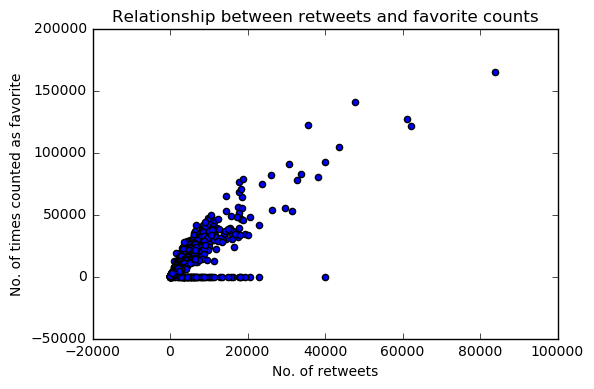

In [255]:
plt.scatter(df_master_clean.retweet_count,df_master_clean.favorite_count)
plt.title("Relationship between retweets and favorite counts")
plt.xlabel("No. of retweets")
plt.ylabel("No. of times counted as favorite")
plt.show()